In [ ]:
#import necessary librarries
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from keras.utils import to_categorical

#Covert the folder to list
classes= os.listdir("Pokemon Dataset/Train")
classes

#create the features and labels
train_data=[]  #X
test_data=[]   #Y

#Preprocessing.........

#load the image and covert to array
for catogory in classes:
    folder = f"Pokemon Dataset/Train/{catogory}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)   # store the train_data as a list
        test_data.append(catogory) #same

print("length:",len(train_data))
print("length:",len(test_data))

#Convert the list to array
train_data=np.array(train_data)
test_data= np.array(test_data)

print("Shape:",train_data.shape)
print("Shape:",test_data.shape)

#Reshape the train data
train_data = train_data.reshape(len(train_data), 30000)

print("Reshape:",train_data.shape)

#Create a dict 
category2label = {"Pikachu":0, "Charmander":1,"Bulbasaur":2 }
lable2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

#covert the categorical to numeric
test_data=np.array([category2label[label] for label in test_data])

#This the multi neural network, so we perform one hot coding
test_data=to_categorical(test_data)

features = train_data.shape[1]

#Creste a neural netwrok model
model = Sequential()

model.add(Dense(units=512, activation="relu", input_shape=(features,)))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=3, activation="softmax"))

#Compile The Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Train the model
model.fit(train_data, test_data, batch_size=32, epochs=55)

print("Summary:",model.summary())



c:\Users\sabar\AppData\Local\Programs\Python\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


length: 304
length: 304
Shape: (304, 100, 100, 3)
Shape: (304,)
Reshape: (304, 30000)


c:\Users\sabar\AppData\Local\Programs\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.3373 - loss: 2525.0952
Epoch 2/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.3649 - loss: 2808.0671
Epoch 3/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.4260 - loss: 922.5085
Epoch 4/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.6158 - loss: 268.6817
Epoch 5/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.7954 - loss: 63.2385
Epoch 6/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.7645 - loss: 53.6112
Epoch 7/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.6483 - loss: 156.7312
Epoch 8/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.6588 - loss: 157.7772
Epoch 9/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.7517 - loss: 121.1294
Epoch 10/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.7175 - loss: 154.3351
Epoch 11/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7259 - loss: 153.4755
Epoch 12/55
10/10 ━━━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,599,563 (177.76 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,066,376 (118.51 MB)

Summary: None


Testin Model


In [68]:
#Preprocessing the test data
test_features=[] #features
test_label = []  #labels

#Load the image and convert to array
for catogory in classes:
    folder = f"Pokemon Dataset/Test/{catogory}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_features.append(img)
        test_label.append(catogory)

print("Length of test_features:",len(test_features))
print("Length of test_label:",len(test_label))

#Covert list to array
test_features = np.array(test_features)
test_label = np.array(test_label)

print("Shape:",test_features.shape)

#Reshape the test_feature
test_features= test_features.reshape(123,30000)

print("Shape:",test_features.shape)

#Create a dict
category2label = {"Pikachu":0, "Charmander":1,"Bulbasaur":2 }
lable2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

#Convert a caregorical to numeric
test_label=np.array([category2label[label] for label in test_label])


test_label=to_categorical(test_label)

#Evaluate the model
model.evaluate(test_features, test_label)

#Predict the model
pred = model.predict(test_features).argmax(axis=1)  # Use the actual images
print("Prediction:",pred[-3:])

res = [lable2category[p] for p in pred]
print(res[-3:])

Length of test_features: 123
Length of test_label: 123
Shape: (123, 100, 100, 3)
Shape: (123, 30000)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9744 - loss: 5.7244    
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: [0 0 0]
['Pikachu', 'Pikachu', 'Pikachu']


Actual and Predict


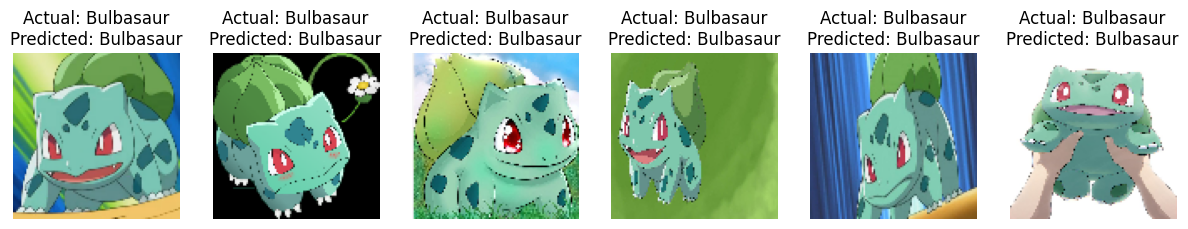

In [54]:
fig, axes = plt.subplots(1, 6, figsize=(15, 10))  # Plot first 5 test images

for i, ax in enumerate(axes):
    ax.imshow(test_features[i].reshape(100, 100, 3).astype("uint8"))  # Ensure correct shape
    actual_label = lable2category[test_label[i].argmax()]  # Convert one-hot label to category
    predicted_label = lable2category[pred[i]]  # Get predicted label
    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis("off")

plt.show()


Predict One Image

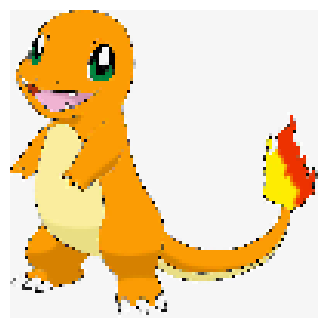

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction: Charmander


In [62]:
path1 = "Pokemon Dataset/Test/Charmander/2200.jpg"

#Load the data and convert to array
test_img = image.load_img(path1, target_size=(100,100))
test_img = image.img_to_array(test_img)

#Show the image using Matplotlib
plt.figure(figsize=(4,4))
plt.imshow(test_img.astype("int"))
plt.axis("off")
plt.show()

#Reshaping the image
test_img= test_img.reshape(1,30000)
test_img.shape

#Predict the value and Convert into label
pred= lable2category[model.predict(test_img).argmax()]
print("Prediction:",pred)